<a href="https://colab.research.google.com/github/MichalDataSc/data_analytics/blob/main/analiza/paradoks_simpsona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simpson's Paradox Demonstration  
### Using Real Berkeley 1973 Graduate Admissions Data  
This notebook shows the classic Simpson’s Paradox:  
- aggregated acceptance rates suggest one gender is favored,  
- but within each department the trend is different (or reversed).  
We fetch real data from an external open dataset.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


## 1. Load real Berkeley admissions dataset  
Data source: University of Illinois Discovery dataset  
URL: https://waf.cs.illinois.edu/discovery/berkeley.csv  

We only select departments A–F, which are the ones from the original Berkeley 1973 study.


In [4]:
url = "https://waf.cs.illinois.edu/discovery/berkeley.csv"

df = pd.read_csv(url)

# Rename columns to match classical notation
df = df.rename(columns={'Major':'Dept', 'Admission':'Decision'})

# Select only departments A–F (matching original Berkeley paper)
df_sub = df[df['Dept'].isin(['A','B','C','D','E','F'])].copy()

df_sub.head()


,Year,Dept,Sex,Decision
0,1973,C,F,Rejected
1,1973,B,M,Accepted
6,1973,F,F,Accepted
9,1973,A,M,Accepted
11,1973,B,M,Accepted


## 2. Aggregated acceptance rate by gender  

This will show the "misleading" result — the one that historically triggered accusations of gender bias.

We compute:  
- total accepted  
- total applicants  
- acceptance rate  


In [6]:
agg = df_sub.groupby('Sex')['Decision'].value_counts().unstack().fillna(0)
agg['Total'] = agg.sum(axis=1)
agg['AcceptanceRate'] = agg['Accepted'] / agg['Total']

print("=== Aggregated acceptance rate by gender ===")
agg[['Accepted','Total','AcceptanceRate']]


=== Aggregated acceptance rate by gender ===


Decision,Accepted,Total,AcceptanceRate
Sex,,,
F,557,1835,0.303542
M,1511,3004,0.502996


## 3. Acceptance rate by department and gender  

Here we drill down into each department.  
You should see that the acceptance rates differ dramatically between departments,  
and that the aggregated difference disappears or reverses within groups.  


In [9]:
dept_gender = df_sub.groupby(['Dept','Sex'])['Decision'].value_counts().unstack().fillna(0)
dept_gender['Total'] = dept_gender.sum(axis=1)
dept_gender['AcceptanceRate'] = dept_gender['Accepted'] / dept_gender['Total']

print("=== Acceptance rate by department & gender ===")
dept_gender[['Accepted','Total','AcceptanceRate']]


=== Acceptance rate by department & gender ===


Decision  Accepted  Total  AcceptanceRate
Dept Sex                                 
A    F          89    108        0.824074
     M         825   1138        0.724956
B    F          17     25        0.680000
     M         353    560        0.630357
C    F         201    593        0.338954
     M         120    325        0.369231
D    F         131    375        0.349333
     M         138    417        0.330935
E    F          94    393        0.239186
     M          53    191        0.277487
F    F          25    341        0.073314
     M          22    373        0.058981

## 4. Visualizing the paradox  
Two plots:

- **Aggregated acceptance rate** by gender  
- **Acceptance rate by department**, split by gender  

We should clearly see how the aggregated picture contradicts the departmental one.


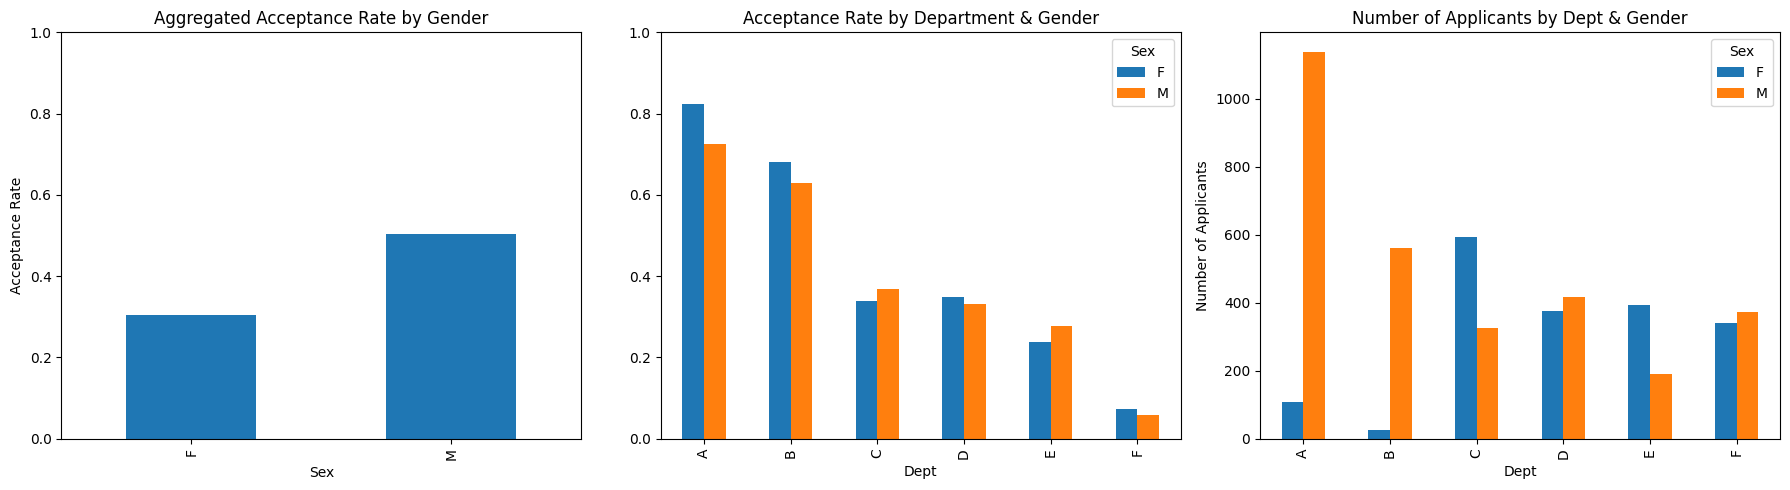

In [12]:
plt.figure(figsize=(18,5))

# ---------------------------------------
# 1. Aggregated acceptance rate
# ---------------------------------------
plt.subplot(1,3,1)
agg['AcceptanceRate'].plot(kind='bar')
plt.title("Aggregated Acceptance Rate by Gender")
plt.ylabel("Acceptance Rate")
plt.ylim(0,1)

# ---------------------------------------
# 2. Acceptance rate by department & gender
# ---------------------------------------
plt.subplot(1,3,2)
pivot = dept_gender['AcceptanceRate'].unstack()
pivot.plot(kind='bar', ax=plt.gca())
plt.title("Acceptance Rate by Department & Gender")
plt.ylim(0,1)

# ---------------------------------------
# 3. Number of applicants by department & gender
#    ✨ This shows WHY the paradox happens ✨
# ---------------------------------------
plt.subplot(1,3,3)

# Count applicants
counts = df_sub.groupby(['Dept','Sex'])['Decision'].count().unstack()

counts.plot(kind='bar', ax=plt.gca())
plt.title("Number of Applicants by Dept & Gender")
plt.ylabel("Number of Applicants")

plt.tight_layout()
plt.show()
